# Linear Regression

🎯 In this exercise, you will model the performance of a NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [4]:
# !poetry add seaborn

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [7]:
# YOUR CODE HERE

nba = pd.read_csv('../data/NBA.csv')

print(nba.shape, '\n')

nba.head()

(4000, 6) 



,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define the feature set and target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` the target.

In [9]:
# YOUR CODE HERE

X = nba[['mp']]
y = nba['win_rating']

X.shape, y.shape

((4000, 1), (4000,))

👇 In a scatter plot ([doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)) , visualize the relationship between the rating and the minutes played.

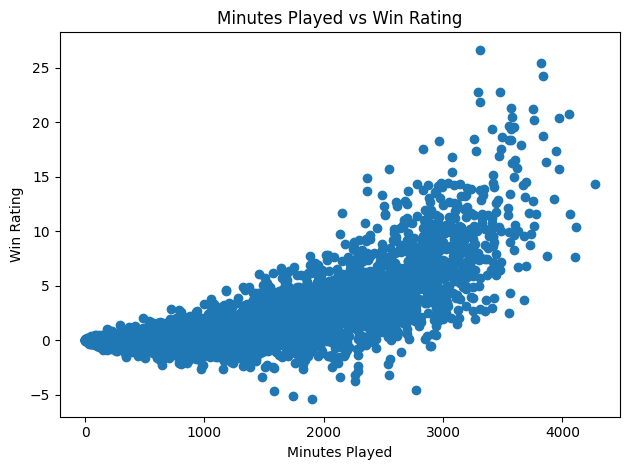

In [11]:
# YOUR CODE HERE
plt.scatter(X, y)

plt.title('Minutes Played vs Win Rating')
plt.xlabel('Minutes Played')
plt.ylabel('Win Rating')

plt.tight_layout()

ℹ️ The scatter plot should hint at the somewhat linear relationship.

## 2. Cross-validation

👇 Using Sklearn's `cross_validate` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)), run a 5-fold cross validation on a `LinearRegression` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) model predicting the player performance rating from minutes played. Save the raw output of the cross validation under a new variable `cv_results`.

In [12]:
# YOUR CODE HERE
linreg_model = LinearRegression()

cv_results = cross_validate(linreg_model, X, y, cv = 5)
cv_results

{'fit_time': array([0.02074695, 0.00195813, 0.00183821, 0.00213504, 0.00238585]),
 'score_time': array([0.00883794, 0.00109386, 0.00141478, 0.00229216, 0.00191998]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

❓ What is the lowest score of the cross validation? Compute your answer and save the value under new variable `min_score`.

In [13]:
# YOUR CODE HERE
min_score = cv_results['test_score'].min()
min_score

np.float64(0.53447908222725)

❓ What is the highest score of the cross validation?  Compute your answer and save the value under new variable `max_score`.

In [14]:
# YOUR CODE HERE
max_score = cv_results['test_score'].max()
max_score

np.float64(0.5791776193355004)

❓ What is the mean score of the cross validation? Compute your answer and save the value under new variable `mean_score`.

In [15]:
# YOUR CODE HERE
mean_score = cv_results['test_score'].mean()
mean_score

np.float64(0.556730180006891)

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as K folds increases from 2 until 20.

In [16]:
len([x for x in np.arange(2, 40)])

38

In [17]:
# YOUR CODE HERE

ks = np.arange(2, 41)

total_comp_time = np.array(
    [cross_validate(linreg_model, X, y, cv = x)['fit_time'].sum() for x in ks]
)

mean_score_per_k = np.array(
    [cross_validate(linreg_model, X, y, cv = x)['test_score'].mean() for x in ks]
)

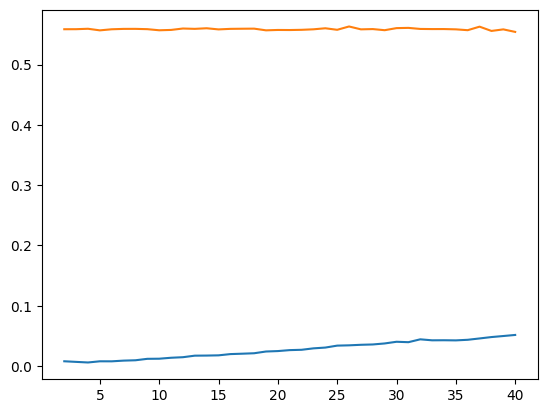

In [18]:
# YOUR CODE HERE

# Plotting total_comp_time and mean_score_per_k vs ks
plt.plot(ks, total_comp_time)
plt.plot(ks, mean_score_per_k);

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the model

Cross validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross validation. 

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict!). Save the trained model under the variable `model`.

In [19]:
# YOUR CODE HERE

# Retrieving previous model linreg_model and save it to model variable as requested
model = linreg_model

# Fitting the model
model.fit(X, y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under variable name `slope`.

In [20]:
# YOUR CODE HERE
slope = model.coef_[0]

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under variable name `intercept`.

In [21]:
# YOUR CODE HERE
intercept = model.intercept_

🤔 Make sure you understand how to interpret these coefficients before moving on.

## 4. Predict

👇 With matplotlib: 
- Define the line of best fit equation (using the slope and intercept values)
- Plot it in a graph over the scattered data points

In [22]:
# YOUR CODE HERE
X_min, X_max = np.array(X.min())[0], np.array(X.max())[0]
X_min, X_max

(np.int64(0), np.int64(4270))

In [23]:
# Creating line with np.linspace
xx = np.linspace(X_min, X_max, 2000)
yy = np.array(intercept + slope * xx)

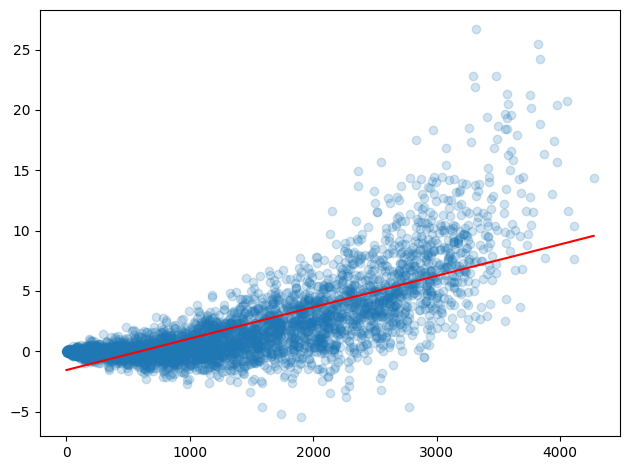

In [24]:
plt.scatter(X, y, alpha = .2)
plt.plot(xx, yy, c = 'red')

plt.tight_layout()

# 5. Predict

👇 Use your trained model to predict the sale price of a house with a living area of 1500 square feet. Save the predicted price as variable name `prediction`.

In [25]:
# YOUR CODE HERE
prediction = model.predict([[1500]])[0]

### ☑️ Test your code

In [26]:
from nbresult import ChallengeResultdd

result = ChallengeResult('prediction',dd
                         prediction = predictiondd
)

result.write()
print(result.check())

ModuleNotFoundError: No module named 'nbresult'

## 5. Improving the model with more features

Your friend who enjoys NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

In [ ]:
# YOUR CODE HERE

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [ ]:
# YOUR CODE HERE

❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
# YOUR CODE HERE

### ☑️ Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('improved_score',
                         improved_score = mean_2_feat_score
)

result.write()
print(result.check())

You should see an **increase of around 8%** to your $R^2$ 👏

Congrats you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁